<h1 align="center">CAS Analysis</h1>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error 

import random
sns.set_theme()

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd gdrive/MyDrive

[Errno 2] No such file or directory: 'gdrive/MyDrive'
/content/gdrive/MyDrive


## Importing data

In [ ]:
df= pd.read_csv('cas_data.csv')
df.head()

,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashFinancialYear,crashLocation1,crashLocation2,crashRoadSideRoad,crashSeverity,crashSHDescription,crashYear,debris,directionRoleDescription,ditch,fatalCount,fence,flatHill,guardRail,holiday,houseOrBuilding,intersection,kerb,light,meshblockId,minorInjuryCount,moped,motorcycle,NumberOfLanes,objectThrownOrDropped,otherObject,otherVehicleType,overBank,parkedVehicle,pedestrian,phoneBoxEtc,postOrPole,region,roadCharacter,roadLane,roadSurface,roadworks,schoolBus,seriousInjuryCount,slipOrFlood,speedLimit,strayAnimal,streetLight,suv,taxi,temporarySpeedLimit,tlaId,tlaName,trafficControl,trafficIsland,trafficSign,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
0,1406914.0,4915023.0,1,NaN,602800.0,0.0,NaN,0.0,1.0,NaN,Null,2000/2001,MIDLAND ST,PORTSMOUTH DRIVE,NaN,Non-Injury Crash,No,2000,NaN,East,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Overcast,2895200.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Otago Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,70.0,NaN,Null,0.0,0.0,NaN,71.0,Dunedin City,Give way,NaN,NaN,NaN,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine,Null
1,1799023.0,5814728.0,2,NaN,528900.0,0.0,NaN,0.0,3.0,NaN,North,2011/2012,SH 1N,KILLARNEY ROAD,NaN,Non-Injury Crash,Yes,2012,NaN,South,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Bright sun,915900.0,0.0,0.0,0.0,4.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Waikato Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,60.0,NaN,Null,0.0,0.0,NaN,16.0,Hamilton City,Unknown,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
2,1741193.0,5976099.0,3,55.0,506660.0,0.0,0.0,0.0,1.0,1.0,North,2006/2007,SH 1N,SAUNDERS ROAD,NaN,Non-Injury Crash,Yes,2007,0.0,North,0.0,0.0,0.0,Flat,0.0,NaN,0.0,NaN,0.0,Twilight,136700.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,Auckland Region,Bridge,2-way,Sealed,0.0,0.0,0.0,0.0,100.0,0.0,None,0.0,0.0,NaN,76.0,Auckland,Nil,0.0,0.0,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Light rain,Null
3,1790288.0,5837387.0,4,NaN,526601.0,0.0,0.0,0.0,1.0,1.0,North,2006/2007,RIVERVIEW ROAD,HAKARIMATA ROAD,NaN,Non-Injury Crash,No,2006,0.0,North,0.0,0.0,0.0,Flat,0.0,NaN,0.0,NaN,0.0,Overcast,852200.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,Waikato Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,100.0,0.0,None,0.0,0.0,NaN,13.0,Waikato District,Nil,0.0,0.0,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Light rain,Null
4,1615675.0,5423627.0,5,NaN,584201.0,0.0,NaN,0.0,2.0,NaN,Null,2003/2004,TALBOT ST,ELIZABETH ST,NaN,Non-Injury Crash,No,2003,NaN,West,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Overcast,2361500.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Tasman Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,50.0,NaN,Null,0.0,0.0,NaN,51.0,Tasman District,Give way,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null


In [ ]:
df['crashSeverity'].value_counts()

Non-Injury Crash    534058
Minor Crash         174849
Serious Crash        42884
Fatal Crash           6966
Name: crashSeverity, dtype: int64

In [ ]:
df.shape

(758757, 72)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758757 entries, 0 to 758756
Data columns (total 72 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   X                          758757 non-null  float64
 1   Y                          758757 non-null  float64
 2   OBJECTID                   758757 non-null  int64  
 3   advisorySpeed              28369 non-null   float64
 4   areaUnitID                 758675 non-null  float64
 5   bicycle                    758752 non-null  float64
 6   bridge                     301585 non-null  float64
 7   bus                        758752 non-null  float64
 8   carStationWagon            758752 non-null  float64
 9   cliffBank                  301585 non-null  float64
 10  crashDirectionDescription  758757 non-null  object 
 11  crashFinancialYear         758757 non-null  object 
 12  crashLocation1             758757 non-null  object 
 13  crashLocation2             75

In [ ]:
null_columns = df.columns[df.isnull().any()]
(df[null_columns].isnull().sum()/len(df))*100

advisorySpeed                96.261122
areaUnitID                    0.010807
bicycle                       0.000659
bridge                       60.252755
bus                           0.000659
carStationWagon               0.000659
cliffBank                    60.252755
crashLocation2                0.103327
crashRoadSideRoad           100.000000
debris                       60.252755
directionRoleDescription      0.010675
ditch                        60.252755
fatalCount                    0.018056
fence                        60.252755
guardRail                    60.252755
holiday                      94.603147
houseOrBuilding              60.252755
intersection                100.000000
kerb                         60.252755
meshblockId                   0.010807
minorInjuryCount              0.018056
moped                         0.000659
motorcycle                    0.000659
NumberOfLanes                 0.186094
objectThrownOrDropped        60.252755
otherObject              

## Pre-processing

### Replacing Null with NaN

In [ ]:
df.replace("Null",np.NaN,inplace=True)
df.head()

,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashFinancialYear,crashLocation1,crashLocation2,crashRoadSideRoad,crashSeverity,crashSHDescription,crashYear,debris,directionRoleDescription,ditch,fatalCount,fence,flatHill,guardRail,holiday,houseOrBuilding,intersection,kerb,light,meshblockId,minorInjuryCount,moped,motorcycle,NumberOfLanes,objectThrownOrDropped,otherObject,otherVehicleType,overBank,parkedVehicle,pedestrian,phoneBoxEtc,postOrPole,region,roadCharacter,roadLane,roadSurface,roadworks,schoolBus,seriousInjuryCount,slipOrFlood,speedLimit,strayAnimal,streetLight,suv,taxi,temporarySpeedLimit,tlaId,tlaName,trafficControl,trafficIsland,trafficSign,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
0,1406914.0,4915023.0,1,NaN,602800.0,0.0,NaN,0.0,1.0,NaN,NaN,2000/2001,MIDLAND ST,PORTSMOUTH DRIVE,NaN,Non-Injury Crash,No,2000,NaN,East,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Overcast,2895200.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Otago Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,70.0,NaN,NaN,0.0,0.0,NaN,71.0,Dunedin City,Give way,NaN,NaN,NaN,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine,NaN
1,1799023.0,5814728.0,2,NaN,528900.0,0.0,NaN,0.0,3.0,NaN,North,2011/2012,SH 1N,KILLARNEY ROAD,NaN,Non-Injury Crash,Yes,2012,NaN,South,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Bright sun,915900.0,0.0,0.0,0.0,4.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Waikato Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,60.0,NaN,NaN,0.0,0.0,NaN,16.0,Hamilton City,Unknown,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,NaN
2,1741193.0,5976099.0,3,55.0,506660.0,0.0,0.0,0.0,1.0,1.0,North,2006/2007,SH 1N,SAUNDERS ROAD,NaN,Non-Injury Crash,Yes,2007,0.0,North,0.0,0.0,0.0,Flat,0.0,NaN,0.0,NaN,0.0,Twilight,136700.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,Auckland Region,Bridge,2-way,Sealed,0.0,0.0,0.0,0.0,100.0,0.0,None,0.0,0.0,NaN,76.0,Auckland,Nil,0.0,0.0,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Light rain,NaN
3,1790288.0,5837387.0,4,NaN,526601.0,0.0,0.0,0.0,1.0,1.0,North,2006/2007,RIVERVIEW ROAD,HAKARIMATA ROAD,NaN,Non-Injury Crash,No,2006,0.0,North,0.0,0.0,0.0,Flat,0.0,NaN,0.0,NaN,0.0,Overcast,852200.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,Waikato Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,100.0,0.0,None,0.0,0.0,NaN,13.0,Waikato District,Nil,0.0,0.0,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Light rain,NaN
4,1615675.0,5423627.0,5,NaN,584201.0,0.0,NaN,0.0,2.0,NaN,NaN,2003/2004,TALBOT ST,ELIZABETH ST,NaN,Non-Injury Crash,No,2003,NaN,West,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Overcast,2361500.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Tasman Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,50.0,NaN,NaN,0.0,0.0,NaN,51.0,Tasman District,Give way,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,NaN


In [ ]:
df.region.value_counts()

Auckland Region              266242
Waikato Region                80199
Canterbury Region             76127
Wellington Region             73647
Bay of Plenty Region          43058
Manawatū-Whanganui Region     41873
Otago Region                  41458
Northland Region              30299
Hawke's Bay Region            29586
Southland Region              18787
Taranaki Region               16918
Gisborne Region                8878
Marlborough Region             7633
Nelson Region                  7495
Tasman Region                  6904
West Coast Region              6731
Name: region, dtype: int64

### Droping attributes with more than 90% missing values

In [ ]:
df.drop(["OBJECTID","advisorySpeed","crashRoadSideRoad","tlaId","meshblockId","intersection","areaUnitID","temporarySpeedLimit","pedestrian","holiday","weatherB"],axis=1,inplace=True)
df.drop_duplicates(inplace=True)

### Droping null values in Region 

In [ ]:
df.dropna(subset=['crashSeverity'],inplace=True)

In [ ]:
df.shape

(758006, 61)

### Null values count in each attribute

### Handling missing values of fatal count

In [ ]:
df['fatalCount'].isna().sum()

137

In [ ]:
df['fatalCount'].value_counts()

0.0    750903
1.0      6284
2.0       524
3.0       109
4.0        37
5.0         6
6.0         3
9.0         1
7.0         1
8.0         1
Name: fatalCount, dtype: int64

In [ ]:
df['fatalCount'] = df.apply(
    lambda row: 1 if np.isnan(row['fatalCount']) and row['crashSeverity']=='Fatal Crash' else row['fatalCount'],
    axis=1
)
df['fatalCount'].fillna(0,inplace=True)

### Handling missing values of serious injury count

In [ ]:
df['seriousInjuryCount'].isna().sum()

137

In [ ]:
df['seriousInjuryCount'].value_counts()

0.0     713031
1.0      39345
2.0       4270
3.0        848
4.0        252
5.0         79
6.0         26
7.0          8
8.0          5
10.0         2
9.0          1
14.0         1
12.0         1
Name: seriousInjuryCount, dtype: int64

In [ ]:
df['seriousInjuryCount'] = df.apply(
    lambda row: 1 if np.isnan(row['seriousInjuryCount']) and row['crashSeverity']=='Serious Crash' else row['seriousInjuryCount'],
    axis=1
)
df['seriousInjuryCount'].fillna(0,inplace=True)

### Handling missing values of Minor injury count

In [ ]:
df['minorInjuryCount'].isna().sum()

137

In [ ]:
df['minorInjuryCount'].value_counts()

0.0     569362
1.0     151021
2.0      27999
3.0       6475
4.0       2040
5.0        615
6.0        220
7.0         80
8.0         23
9.0         13
10.0         7
11.0         2
16.0         2
18.0         2
34.0         1
12.0         1
15.0         1
14.0         1
13.0         1
26.0         1
30.0         1
21.0         1
Name: minorInjuryCount, dtype: int64

In [ ]:
df['minorInjuryCount'] = df.apply(
    lambda row: 1 if np.isnan(row['minorInjuryCount']) and row['crashSeverity']=='Minor Crash' else row['minorInjuryCount'],
    axis=1
)
df['minorInjuryCount'].fillna(0,inplace=True)

## Handling missing values in all numerical variables

In [ ]:
df['bicycle'].fillna(0,inplace=True)
df['bus'].fillna(0,inplace=True)
df['carStationWagon'].fillna(0,inplace=True)
df['moped'].fillna(0,inplace=True)
df['motorcycle'].fillna(0,inplace=True)
df['otherVehicleType'].fillna(0,inplace=True)
df['schoolBus'].fillna(0,inplace=True)
df['suv'].fillna(0,inplace=True)
df['taxi'].fillna(0,inplace=True)
df['truck'].fillna(0,inplace=True)
df['unknownVehicleType'].fillna(0,inplace=True)
df['vanOrUtility'].fillna(0,inplace=True)
df['bridge'].fillna(0,inplace=True)
df['cliffBank'].fillna(0,inplace=True)
df['debris'].fillna(0,inplace=True)
df['ditch'].fillna(0,inplace=True)
df['fence'].fillna(0,inplace=True)
df['truck'].fillna(0,inplace=True)
df['guardRail'].fillna(0,inplace=True)
df['houseOrBuilding'].fillna(0,inplace=True)
df['kerb'].fillna(0,inplace=True)
df['NumberOfLanes'].fillna(1,inplace=True)
df['objectThrownOrDropped'].fillna(0,inplace=True)
df['otherObject'].fillna(0,inplace=True)
df['overBank'].fillna(0,inplace=True)
df['parkedVehicle'].fillna(0,inplace=True)
df['phoneBoxEtc'].fillna(0,inplace=True)
df['postOrPole'].fillna(0,inplace=True)
df['roadworks'].fillna(0,inplace=True)
df['slipOrFlood'].fillna(0,inplace=True)
df['speedLimit'].fillna(0,inplace=True)
df['strayAnimal'].fillna(0,inplace=True)
df['train'].fillna(0,inplace=True)
df['tree'].fillna(0,inplace=True)
df['vehicle'].fillna(0,inplace=True)
df['trafficIsland'].fillna(0,inplace=True)
df['trafficSign'].fillna(0,inplace=True)
df['waterRiver'].fillna(0,inplace=True)

In [ ]:
df['crashDirectionDescription'].fillna('None',inplace=True)
df['crashLocation2'].fillna('None',inplace=True)
df['directionRoleDescription'].fillna('None',inplace=True)
df['flatHill'].fillna('None',inplace=True)
df['region'].fillna('None',inplace=True)
df['roadLane'].fillna('None',inplace=True)
df['roadSurface'].fillna('None',inplace=True)
df['streetLight'].fillna('None',inplace=True)
df['tlaName'].fillna('None',inplace=True)
df['weatherA'].fillna('None',inplace=True)

In [ ]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [ ]:
np.random.seed(108)
df['claimAmount'] = df.apply(lambda row: (row['minorInjuryCount']*np.random.randint(2000000,5000000))+(row['fatalCount']*250000)+(row['seriousInjuryCount']*np.random.randint(5000000,10000000)), axis = 1)

In [ ]:
#df = df[df['crashSeverity'] != 'Non-Injury Crash']
#df = df[df['claimAmount'] > 0]
#df['Log_claimAmount'] = np.log(df['claimAmount'])

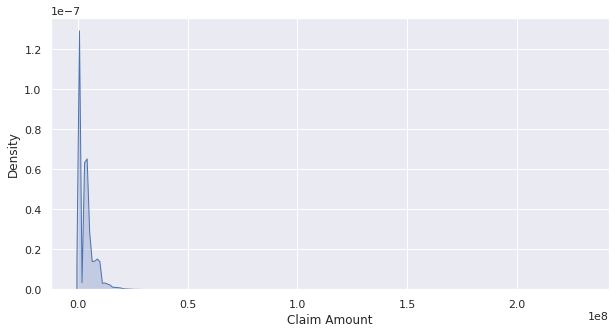

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('Claim Amount')
plt.ylabel('Density')
sns.kdeplot(df['claimAmount'],shade=True)
plt.show()

In [ ]:
#df.set_index('crashYear')

In [ ]:
#df1 = pd.get_dummies(df[['crashFinancialYear','crashSeverity', 'crashSHDescription', 'light', 'region', 'urban']])
#df2 = df[['crashYear', 'X', 'Y', 'bicycle', 'bridge', 'bus', 'carStationWagon', 'cliffBank', 'debris', 'fatalCount', 'fence', 'guardRail', 'minorInjuryCount', 'NumberOfLanes', 'parkedVehicle', 'seriousInjuryCount', 'speedLimit', 'unknownVehicleType', 'claimAmount']]
#df3 = pd.concat([df1, df2], axis=1, join='inner')
#df3.shape

In [ ]:
#df1.shape

In [ ]:
#df2.shape

In [ ]:
#df3 = pd.concat([df1, df2])

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['crashFinancialYear'] = le.fit_transform(df['crashFinancialYear'])


In [ ]:
#1 for injury and 0 for non-injury
df['injury'] = df.apply(
    lambda row: 0 if row['crashSeverity']=='Non-Injury Crash' else 1,
    axis=1
)

In [ ]:
#df['crashSeverity'] = le.inverse_transform(df['crashSeverity'])

In [ ]:
df['light'] = le.fit_transform(df['light'])

In [ ]:
df['roadLane'] = le.fit_transform(df['roadLane'])

In [ ]:
df['crashSHDescription'] = le.fit_transform(df['crashSHDescription'])

In [ ]:
df['flatHill'] = le.fit_transform(df['flatHill'])

In [ ]:
df['weatherA'] = le.fit_transform(df['weatherA'])

In [ ]:
df['roadCharacter'] = le.fit_transform(df['roadCharacter'])

In [ ]:
df['trafficControl'] = le.fit_transform(df['trafficControl'])

In [ ]:
df['urban'] = le.fit_transform(df['urban'])

In [ ]:
df['crashSHDescription'].value_counts()

0    535428
2    222530
1        48
Name: crashSHDescription, dtype: int64

In [ ]:
#df['crashFinancialYear'] = df['crashFinancialYear'] - df.crashFinancialYear.mean()

In [ ]:
df['injury'].value_counts()

0    533356
1    224650
Name: injury, dtype: int64

In [ ]:
df.region

0                 Otago Region
1               Waikato Region
2              Auckland Region
3               Waikato Region
4                Tasman Region
                  ...         
758752    Bay of Plenty Region
758753         Auckland Region
758754          Waikato Region
758755      Hawke's Bay Region
758756       Wellington Region
Name: region, Length: 758006, dtype: object

In [ ]:
#df = df[['bicycle', 'bridge', 'bus', 'carStationWagon', 'cliffBank', 'crashFinancialYear', 'debris', 'ditch', 'fence', 'flatHill', 'guardRail', 'houseOrBuilding', 'kerb', 'light', 'moped', 'motorcycle', 'NumberOfLanes', 'objectThrownOrDropped', 'otherObject', 'otherVehicleType', 'overBank', 'parkedVehicle', 'roadworks', 'schoolBus', 'slipOrFlood', 'speedLimit', 'strayAnimal', 'suv', 'taxi', 'trafficSign', 'trafficControl', 'train', 'tree', 'truck', 'urban', 'vehicle', 'injury']]

In [ ]:
np.random.seed(108)
mask = np.random.rand(len(df)) <= 0.8
df_train = df[mask]
df_test = df[~mask]

In [ ]:
df.shape

(758006, 63)

In [ ]:
df_train.shape

(606662, 63)

In [ ]:
df_test.shape

(151344, 63)

In [ ]:
x = df.iloc[:,:-1]

In [ ]:
x.shape

(758006, 36)

In [ ]:
y = df.iloc[:, -1:]
y.shape

(758006, 1)

In [ ]:
y = np.ravel(y)

# Logistic Regression

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [ ]:
def get_models():
	models = dict()
	for i in range(2, 39):
		rfe = RFE(estimator=LogisticRegression(random_state = 0), n_features_to_select=i)
		model = LogisticRegression(random_state = 0)
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

In [ ]:
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [ ]:
#classifier = LogisticRegression(random_state = 0)

In [ ]:
models = get_models()

In [ ]:
results, names = list(), list()

In [ ]:
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

KeyboardInterrupt: ignored

In [ ]:
y = np.ravel(y)

In [ ]:
rfe = RFE(estimator=PoissonRegressor(), n_features_to_select=10)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 17.000
Column: 2, Selected False, Rank: 11.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 4.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected False, Rank: 16.000
Column: 7, Selected False, Rank: 7.000
Column: 8, Selected False, Rank: 2.000
Column: 9, Selected False, Rank: 13.000
Column: 10, Selected False, Rank: 12.000
Column: 11, Selected False, Rank: 10.000
Column: 12, Selected False, Rank: 15.000
Column: 13, Selected False, Rank: 18.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected False, Rank: 5.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected True, Rank: 1.000
Column: 19, Selected False, Rank: 20.000
Column: 20, Selected False, Rank: 22.000
Column: 21, Selected False, Rank: 28.000
Column: 22, Selected False, Rank: 9.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected False, Rank: 29.000
Column

# Decision Trees

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [ ]:
rfc=RandomForestClassifier(random_state=42)

In [ ]:
param_grid = { 
    'n_estimators': [50,100,150,200],
    'max_features': ['sqrt','log2'],
    'max_depth' : [13,14,15,16],
    'criterion' :['gini','entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train,y_train)

In [ ]:
CV_rfc.best_params_

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 150, max_depth=13, criterion='gini')

In [ ]:
rfc1.fit(x_train, y_train)

In [ ]:
dataframe = pd.DataFrame({'columns': x_train.columns,
                          'importance': rfc1.feature_importances_})

dataframe.sort_values('importance', ascending=False)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = rfc1.predict(x_test)
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report

In [ ]:
print("precision_score: "+ str(precision_score(y_test,y_pred,average="micro")))
print("recall_score: "+ str(recall_score(y_test,y_pred,average="micro")))
print("f1_score: "+ str(f1_score(y_test,y_pred,average="micro")))

In [ ]:
print(classification_report(y_test, y_pred, target_names=["injury", "non-injury"]))

In [ ]:
print("precision_score: "+ str(precision_score(y_test,y_pred,average="macro")))
print("recall_score: "+ str(recall_score(y_test,y_pred,average="macro")))
print("f1_score: "+ str(f1_score(y_test,y_pred,average="macro")))

In [ ]:
import lime
import lime.lime_tabular

In [ ]:
predict_fn_rf = lambda x: rfc1.predict_proba(x).astype(float)
X = x_train.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = x_train.columns,class_names=["injury", "non-injury"],kernel_width=5)

In [ ]:
x_test.iloc[[421]]

In [ ]:
choosen_instance = x_test.iloc[[14569]].values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=10)
exp.show_in_notebook(show_all=False)

# Arima

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adfuller_test(claim):
    result=adfuller(claim)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df_train['claimAmount'])

ADF Test Statistic : -46.330534491171576
p-value : 0.0
#Lags Used : 66
Number of Observations : 179741
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_train['claimAmount'])
plt.show()

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df_train.claimAmount); axes[0, 0].set_title('Original Series')
plot_acf(df_train.claimAmount, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_train.claimAmount.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_train.claimAmount.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_train.claimAmount.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_train.claimAmount.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df_train.claimAmount, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.claimAmount   No. Observations:               179807
Model:                 ARIMA(1, 1, 2)   Log Likelihood            -2995298.496
Method:                       css-mle   S.D. of innovations        4153440.264
Date:                Mon, 11 Apr 2022   AIC                        5990606.993
Time:                        05:50:55   BIC                        5990657.491
Sample:                             1   HQIC                       5990621.924
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.7298      1.476     -3.204      0.001      -7.623      -1.837
ar.L1.D.claimAmount    -0.7187        nan        nan        nan         nan         nan
ma.L1.D.claimAmo

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


In [ ]:
# Plot residual errors
sns.distplot(model_fit.resid)

In [ ]:
fc = model_fit.forecast(15, alpha=0.05)

In [ ]:
fc

# LSTMs


In [ ]:
import scipy
import numpy
import tensorflow as tf
from tensorflow import keras as k
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

In [ ]:
# Split train data to X and y
x_train = df_train.iloc[:, :-1].values
y_train = df_train.loc[:,['claimAmount']]
# Split test data to X and y
x_test = df_test.iloc[:, :-1].values
y_test = df_test.loc[:,['claimAmount']]

In [ ]:
y_train.shape

(179808, 1)

In [ ]:
# Create a 3D input
def create_dataset (X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)
    
TIME_STEPS = 30

X_test, y_test = create_dataset(x_test, y_test, TIME_STEPS)

X_train, y_train = create_dataset(x_train, y_train, TIME_STEPS)

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (44809, 30, 71)
y_train.shape:  (179778, 1)
X_test.shape:  (44809, 30, 71)
y_test.shape:  (44809, 1)


In [ ]:
X_train[0]

<tf.Tensor: shape=(30, 71), dtype=float32, numpy=
array([[  0.,   0.,   0., ...,   0., 100.,   0.],
       [  0.,   1.,   0., ...,   1.,  50.,   0.],
       [  0.,   0.,   0., ...,   0.,  50.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,  50.,   0.],
       [  0.,   0.,   0., ...,   1., 100.,   0.],
       [  0.,   0.,   0., ...,   0.,  50.,   0.]], dtype=float32)>

In [ ]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [ ]:
def rmse(y_true, y_pred):
  return k.backend.sqrt(k.backend.mean(k.backend.square(y_pred-y_true)))

In [ ]:
# Create BiLSTM model
def create_model_bilstm(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units = units,                             
              return_sequences=True),
              input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(loss=rmse, optimizer='adam')
    return model# Create LSTM or GRU model
def create_model(units, m):
    model = Sequential()
    model.add(m (units = units, return_sequences = True,
                input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2))
    model.add(m (units = units))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    #Compile model
    model.compile(loss=rmse, optimizer='adam')
    return model# BiLSTM
model_bilstm = create_model_bilstm(64)# GRU and LSTM
model_gru = create_model(64, GRU)
model_lstm = create_model(64, LSTM)

In [ ]:
# Fit BiLSTM, LSTM and GRU
def fit_model(model):
    early_stop = k.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)

    # shuffle = False because the order of the data matters
    history = model.fit(X_train, y_train, epochs = 50, validation_split = 0.2,
                    batch_size = 32, shuffle = False, callbacks = [early_stop])
    return history

history_bilstm = fit_model(model_bilstm)
#history_lstm = fit_model(model_lstm)
#history_gru = fit_model(model_gru)

Epoch 1/50
4495/4495 [==============================] - 69s 13ms/step - loss: 6731305.5000 - val_loss: 6730757.5000
Epoch 2/50
4495/4495 [==============================] - 57s 13ms/step - loss: 6730832.0000 - val_loss: 6730280.5000
Epoch 3/50
4495/4495 [==============================] - 56s 12ms/step - loss: 6730363.0000 - val_loss: 6729796.0000
Epoch 4/50
4495/4495 [==============================] - 56s 13ms/step - loss: 6729871.0000 - val_loss: 6729326.0000
Epoch 5/50
4495/4495 [==============================] - 56s 12ms/step - loss: 6729393.5000 - val_loss: 6728849.5000
Epoch 6/50
4495/4495 [==============================] - 55s 12ms/step - loss: 6728925.5000 - val_loss: 6728368.5000
Epoch 7/50
4495/4495 [==============================] - ETA: 0s - loss: 6728442.5000

KeyboardInterrupt: ignored

# TGAN

# LMMs


In [ ]:
df['crashSeverity'].value_counts()

1    174796
3     42880
0      6966
2         5
Name: crashSeverity, dtype: int64

Non-Injury Crash    534058
Minor Crash         174849
Serious Crash        42884
Fatal Crash           6966

Severity wise claim modelling

In [ ]:
df1 = df[df['crashSeverity'] == 1]
df2 = df[df['crashSeverity'] == 0]
df3 = df[df['crashSeverity'] == 3]
df4 = df[df['crashSeverity'] == 2]

In [ ]:
np.random.seed(108)
mask = np.random.rand(len(df1)) <= 0.8
df1_train = df1[mask]
df1_test = df1[~mask]

In [ ]:
df1_train.shape

(139791, 63)

In [ ]:
np.random.seed(108)
mask = np.random.rand(len(df2)) <= 0.8
df2_train = df2[mask]
df2_test = df2[~mask]

In [ ]:
np.random.seed(108)
mask = np.random.rand(len(df3)) <= 0.8
df3_train = df3[mask]
df3_test = df3[~mask]

In [ ]:
np.random.seed(108)
mask = np.random.rand(len(df4)) <= 0.6
df4_train = df4[mask]
df4_test = df4[~mask]

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [ ]:
from statsmodels.genmod.bayes_mixed_glm import PoissonBayesMixedGLM

In [ ]:
df_train.columns

Index(['X', 'Y', 'bicycle', 'bridge', 'bus', 'carStationWagon', 'cliffBank',
       'crashDirectionDescription', 'crashFinancialYear', 'crashLocation1',
       'crashLocation2', 'crashSeverity', 'crashSHDescription', 'crashYear',
       'debris', 'directionRoleDescription', 'ditch', 'fatalCount', 'fence',
       'flatHill', 'guardRail', 'houseOrBuilding', 'kerb', 'light',
       'minorInjuryCount', 'moped', 'motorcycle', 'NumberOfLanes',
       'objectThrownOrDropped', 'otherObject', 'otherVehicleType', 'overBank',
       'parkedVehicle', 'phoneBoxEtc', 'postOrPole', 'region', 'roadCharacter',
       'roadLane', 'roadSurface', 'roadworks', 'schoolBus',
       'seriousInjuryCount', 'slipOrFlood', 'speedLimit', 'strayAnimal',
       'streetLight', 'suv', 'taxi', 'tlaName', 'trafficControl',
       'trafficIsland', 'trafficSign', 'train', 'tree', 'truck',
       'unknownVehicleType', 'urban', 'vanOrUtility', 'vehicle', 'waterRiver',
       'weatherA', 'claimAmount'],
      dtype='object')

In [ ]:
random = {"a": '0+C(region)', "b": '0+C(crashFinancialYear)'}

In [ ]:
model = PoissonBayesMixedGLM.from_formula("minorInjuryCount ~ crashFinancialYear+speedLimit+crashSeverity", random, data=df_train)

In [ ]:
model = model.fit_map()

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/bayes_mixed_glm.py:521: UserWarning: Laplace fitting did not converge, |gradient|=2401.361892
  warnings.warn(msg)


In [ ]:
model.summary()

,Type,Post. Mean,Post. SD,SD,SD (LB),SD (UB)
Intercept,M,0.4854,0.0123,,,
crashFinancialYear,M,-0.0053,0.0004,,,
speedLimit,M,0.0012,0.0001,,,
crashSeverity,M,-0.4107,0.0036,,,
a,V,-3.4098,0.2206,0.033,0.021,0.051
b,V,-22.0000,1.0000,0.000,0.000,0.000


In [ ]:
pred = model.predict(df_test[['crashFinancialYear', 'speedLimit', 'crashSeverity']])

In [ ]:
pred.shape

(44839,)

In [ ]:
pd.Series(np.round(pred)).value_counts()

0.0      21183
1.0       5157
2.0       1868
4.0       1609
40.0      1214
         ...  
47.0         3
111.0        3
20.0         2
126.0        2
77.0         1
Length: 71, dtype: int64

In [ ]:
df_test['minorInjuryCount'].value_counts()

1.0     30113
0.0      7151
2.0      5700
3.0      1295
4.0       397
5.0       116
6.0        44
7.0        14
9.0         3
34.0        1
12.0        1
10.0        1
13.0        1
8.0         1
16.0        1
Name: minorInjuryCount, dtype: int64

In [ ]:
df_train.columns

Index(['bicycle', 'bridge', 'bus', 'carStationWagon', 'cliffBank',
       'crashFinancialYear', 'debris', 'ditch', 'fence', 'flatHill',
       'guardRail', 'houseOrBuilding', 'kerb', 'light', 'moped', 'motorcycle',
       'NumberOfLanes', 'objectThrownOrDropped', 'otherObject',
       'otherVehicleType', 'overBank', 'parkedVehicle', 'roadworks',
       'schoolBus', 'slipOrFlood', 'speedLimit', 'strayAnimal', 'suv', 'taxi',
       'trafficSign', 'trafficControl', 'train', 'tree', 'truck', 'urban',
       'vehicle', 'injury'],
      dtype='object')

model

In [ ]:
model = sm.MixedLM.from_formula("claimAmount ~ crashFinancialYear+speedLimit+crashSeverity+crashSHDescription+roadLane", groups=df_train["region"], data=df_train)
result = model.fit()

# The BLUPs
re = result.random_effects

# Multiply each BLUP by the random effects design matrix for one group
rex = [np.dot(model.exog_re_li[j], re[k]) for (j, k) in enumerate(model.group_labels)]

# Add the fixed and random terms to get the overall prediction
rex = np.concatenate(rex)
yp = result.fittedvalues + rex

pred = result.predict(exog=df_test)
print("RMSE: ", np.sqrt(np.mean(np.square(pred - df_test['claimAmount']))))
print("MAE: ", mean_absolute_error(pred, df_test['claimAmount']))


RMSE:  1886096.8126986304
MAE:  673543.3656655798


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Mixed Linear Model Regression Results
===================================================================================================
Model:                         MixedLM            Dependent Variable:            claimAmount       
No. Observations:              606662             Method:                        REML              
No. Groups:                    17                 Scale:                         3714829852119.3633
Min. group size:               2308               Likelihood:                    -9640181.0864     
Max. group size:               212883             Converged:                     Yes               
Mean group size:               35686.0                                                             
---------------------------------------------------------------------------------------------------
                                      Coef.       Std.Err.    z     P>|z|    [0.025       0.975]   
---------------------------------------------------------------------------------------------------
Intercept                            5027809.165 33226.110  151.321 0.000  4962687.185  5092931.145
crashSeverity[T.Minor Crash]         -899154.617 26390.288  -34.071 0.000  -950878.631  -847430.604
crashSeverity[T.Non-Injury Crash]   -5257487.743 26098.365 -201.449 0.000 -5308639.597 -5206335.888
crashSeverity[T.Serious Crash]       4750647.509 27843.707  170.618 0.000  4696074.845  4805220.172
crashFinancialYear                     -8671.196   408.382  -21.233 0.000    -9471.610    -7870.783
speedLimit                              3852.934   135.525   28.430 0.000     3587.310     4118.558
crashSHDescription                     46079.753  3334.479   13.819 0.000    39544.293    52615.212
roadLane                               46317.039  7026.842    6.591 0.000    32544.683    60089.396
Group Var                         3573700059.259   712.314                                         
===================================================================================================

"""

In [ ]:
dir(result)

In [ ]:
result.df_resid

179802

In [ ]:
sdf = df_train[['crashFinancialYear', 'speedLimit', 'crashSeverity', 'crashSHDescription', 'roadLane', 'claimAmount']]
result.predict(exog=sdf)

5         4.795064e+06
13        9.579495e+06
17        4.186643e+06
18        4.336197e+06
20        4.336197e+06
              ...     
758738    4.485752e+06
758741    4.974530e+06
758744    4.396019e+06
758746    5.183907e+06
758747    5.549373e+06
Length: 179808, dtype: float64

In [ ]:
sdf = sdf.sample(frac=1000.0, replace=True)
sdf.shape

In [ ]:
import time

In [ ]:
start = time.time()
result.predict(sdf)
print("time: ", time.time()-start)

In [ ]:
pd.DataFrame(np.round(result.resid))

,0
5,-2386786.0
13,146390.0
17,-496392.0
18,4376428.0
20,9385875.0
...,...
758738,-1778714.0
758741,-2642555.0
758744,-554100.0
758746,-3132009.0


In [ ]:
result.resid

5        -2.386786e+06
13        1.463896e+05
17       -4.963915e+05
18        4.376428e+06
20        9.385875e+06
              ...     
758738   -1.778714e+06
758741   -2.642555e+06
758744   -5.540999e+05
758746   -3.132009e+06
758747   -1.184321e+06
Length: 179808, dtype: float64

In [ ]:
df_train.claimAmount

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


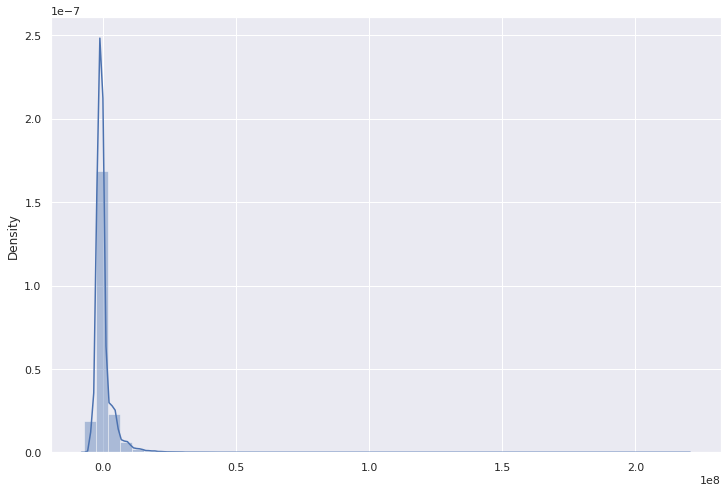

In [ ]:
import seaborn as sns


sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(result.resid)

(array([1.78362e+05, 1.38000e+03, 5.50000e+01, 8.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-7.20129412e+06,  1.54831944e+07,  3.81676829e+07,  6.08521714e+07,
         8.35366599e+07,  1.06221148e+08,  1.28905637e+08,  1.51590125e+08,
         1.74274614e+08,  1.96959102e+08,  2.19643591e+08]),
 <a list of 10 Patch objects>)

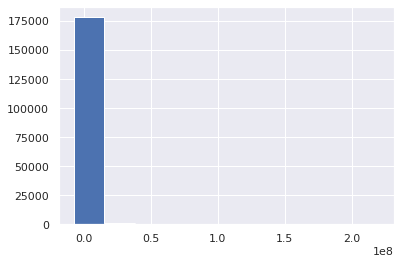

In [ ]:
plt.hist(result.resid)

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(result.resid)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.664, p=0.000
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
from scipy.stats import normaltest

stat, p = normaltest(result.resid)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=209805.366, p=0.000
Sample does not look Gaussian (reject H0)


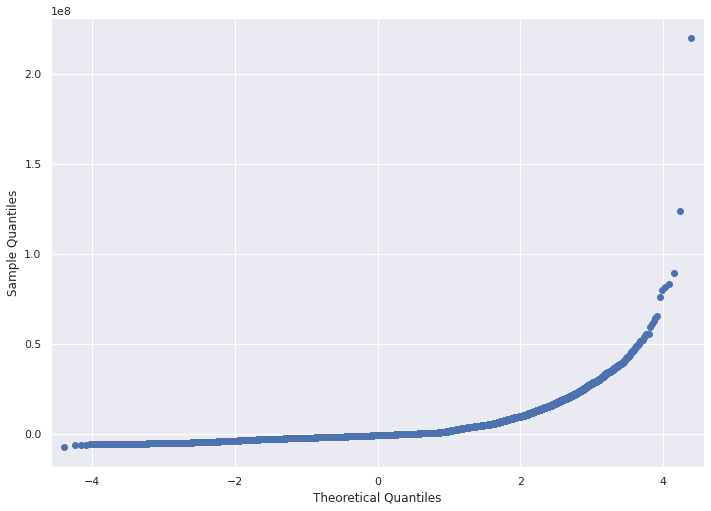

In [ ]:
sm.qqplot(result.resid)
plt.show()

In [ ]:
#model1

model = sm.MixedLM.from_formula("claimAmount ~ crashFinancialYear+speedLimit+crashSHDescription+roadLane", groups=df1_train["region"], data=df1_train)
result = model.fit()

# The BLUPs
re = result.random_effects

# Multiply each BLUP by the random effects design matrix for one group
rex = [np.dot(model.exog_re_li[j], re[k]) for (j, k) in enumerate(model.group_labels)]

# Add the fixed and random terms to get the overall prediction
rex = np.concatenate(rex)
yp = result.fittedvalues + rex

pred = result.predict(exog=df1_test)
print("RMSE: ", np.sqrt(np.mean(np.square(pred - df1_test['claimAmount']))))
print("MAE: ", mean_absolute_error(pred, df1_test['claimAmount']))

result.summary()

RMSE:  2432088.8907627254
MAE:  1542557.8356781972


<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Mixed Linear Model Regression Results
==================================================================================
Model:                  MixedLM       Dependent Variable:       claimAmount       
No. Observations:       139791        Method:                   REML              
No. Groups:             17            Scale:                    6068769341437.7314
Min. group size:        517           Likelihood:               -2255642.8901     
Max. group size:        43742         Converged:                Yes               
Mean group size:        8223.0                                                    
----------------------------------------------------------------------------------
                        Coef.       Std.Err.    z    P>|z|    [0.025      0.975]  
----------------------------------------------------------------------------------
Intercept              4025525.160 45717.206  88.053 0.000 3935921.083 4115129.236
crashFinancialYear      -20145.759  1082.369 -18.613 0.000  -22267.162  -18024.355
speedLimit                6669.626   340.436  19.591 0.000    6002.383    7336.869
crashSHDescription       74651.674  8589.187   8.691 0.000   57817.176   91486.171
roadLane                 76633.476 19719.777   3.886 0.000   37983.423  115283.528
Group Var          12919363253.929  2098.367                                      
==================================================================================

"""

In [ ]:
#model2

model = sm.MixedLM.from_formula("claimAmount ~ crashFinancialYear+speedLimit+crashSHDescription+roadLane", groups=df2_train["region"], data=df2_train)
result = model.fit()

# The BLUPs
re = result.random_effects

# Multiply each BLUP by the random effects design matrix for one group
rex = [np.dot(model.exog_re_li[j], re[k]) for (j, k) in enumerate(model.group_labels)]

# Add the fixed and random terms to get the overall prediction
rex = np.concatenate(rex)
yp = result.fittedvalues + rex

pred = result.predict(exog=df2_test)
print("RMSE: ", np.sqrt(np.mean(np.square(pred - df2_test['claimAmount']))))
print("MAE: ", mean_absolute_error(pred, df2_test['claimAmount']))

result.summary()

RMSE:  8409217.598942945
MAE:  5615286.757749771


<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Mixed Linear Model Regression Results
===================================================================================
Model:                  MixedLM       Dependent Variable:       claimAmount        
No. Observations:       5586          Method:                   REML               
No. Groups:             17            Scale:                    61164882392498.4219
Min. group size:        9             Likelihood:               -96532.7427        
Max. group size:        1047          Converged:                Yes                
Mean group size:        328.6                                                      
-----------------------------------------------------------------------------------
                        Coef.        Std.Err.    z    P>|z|    [0.025      0.975]  
-----------------------------------------------------------------------------------
Intercept               1985488.036 680795.904  2.916 0.004  651152.584 3319823.489
crashFinancialYear       -52530.766  16676.821 -3.150 0.002  -85216.735  -19844.798
speedLimit                32745.488   5520.896  5.931 0.000   21924.730   43566.247
crashSHDescription       928404.019 116478.374  7.971 0.000  700110.601 1156697.437
roadLane                 116233.957 366724.563  0.317 0.751 -602532.979  835000.893
Group Var          223985309456.781  22990.610                                     
===================================================================================

"""

In [ ]:
#model3

model = sm.MixedLM.from_formula("claimAmount ~ crashFinancialYear+speedLimit+crashSHDescription+roadLane", groups=df3_train["region"], data=df3_train)
result = model.fit()

# The BLUPs
re = result.random_effects

# Multiply each BLUP by the random effects design matrix for one group
rex = [np.dot(model.exog_re_li[j], re[k]) for (j, k) in enumerate(model.group_labels)]

# Add the fixed and random terms to get the overall prediction
rex = np.concatenate(rex)
yp = result.fittedvalues + rex

pred = result.predict(exog=df3_test)
print("RMSE: ", np.sqrt(np.mean(np.square(pred - df3_test['claimAmount']))))
print("MAE: ", mean_absolute_error(pred, df3_test['claimAmount']))

result.summary()

RMSE:  5963373.414207909
MAE:  3450609.8264411665


<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Mixed Linear Model Regression Results
====================================================================================
Model:                   MixedLM       Dependent Variable:       claimAmount        
No. Observations:        34392         Method:                   REML               
No. Groups:              17            Scale:                    27453670284680.3477
Min. group size:         96            Likelihood:               -580864.7233       
Max. group size:         7693          Converged:                Yes                
Mean group size:         2023.1                                                     
------------------------------------------------------------------------------------
                        Coef.        Std.Err.     z    P>|z|    [0.025      0.975]  
------------------------------------------------------------------------------------
Intercept               7928301.125 174744.509  45.371 0.000 7585808.181 8270794.069
crashFinancialYear       -51185.708   4550.246 -11.249 0.000  -60104.027  -42267.390
speedLimit                26527.366   1366.105  19.418 0.000   23849.849   29204.883
crashSHDescription       398950.279  34470.825  11.574 0.000  331388.703  466511.855
roadLane                 280504.110  83009.860   3.379 0.001  117807.775  443200.446
Group Var          106296314202.987   9604.494                                      
====================================================================================

"""

In [ ]:
df4_test

,X,Y,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashFinancialYear,crashLocation1,crashLocation2,crashSeverity,crashSHDescription,crashYear,debris,directionRoleDescription,ditch,fatalCount,fence,flatHill,guardRail,houseOrBuilding,kerb,light,minorInjuryCount,moped,motorcycle,NumberOfLanes,objectThrownOrDropped,otherObject,otherVehicleType,overBank,parkedVehicle,phoneBoxEtc,postOrPole,region,roadCharacter,roadLane,roadSurface,roadworks,schoolBus,seriousInjuryCount,slipOrFlood,speedLimit,strayAnimal,streetLight,suv,taxi,tlaName,trafficControl,trafficIsland,trafficSign,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,claimAmount,crash_re
706636,1579110.0,6178689.0,0.0,0.0,1.0,0.0,0.0,South,19,Z TE PAKI STREAM,TE HAPUA ROAD,2,0,2019,0.0,South,0.0,0.0,0.0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Northland Region,Nil,3,Unsealed,0.0,0.0,0.0,0.0,100.0,0.0,None,0.0,0.0,Far North District,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,0,3147060.0,Northland Region_Fine


In [ ]:
#model4

model = sm.MixedLM.from_formula("claimAmount ~ crashFinancialYear+speedLimit+crashSHDescription+roadLane", groups=df4_train["region"], data=df4_train)
result = model.fit()

# The BLUPs
re = result.random_effects

# Multiply each BLUP by the random effects design matrix for one group
rex = [np.dot(model.exog_re_li[j], re[k]) for (j, k) in enumerate(model.group_labels)]

# Add the fixed and random terms to get the overall prediction
rex = np.concatenate(rex)
yp = result.fittedvalues + rex

pred = result.predict(exog=df4_test)
print("RMSE: ", np.sqrt(np.mean(np.square(pred - df4_test['claimAmount']))))
print("MAE: ", mean_absolute_error(pred, df4_test['claimAmount']))

result.summary()

LinAlgError: ignored

In [ ]:
df_train.crash_re.value_counts()

In [ ]:
df_train.columns

Index(['X', 'Y', 'bicycle', 'bridge', 'bus', 'carStationWagon', 'cliffBank',
       'crashDirectionDescription', 'crashFinancialYear', 'crashLocation1',
       'crashLocation2', 'crashSeverity', 'crashSHDescription', 'crashYear',
       'debris', 'directionRoleDescription', 'ditch', 'fatalCount', 'fence',
       'flatHill', 'guardRail', 'houseOrBuilding', 'kerb', 'light',
       'minorInjuryCount', 'moped', 'motorcycle', 'NumberOfLanes',
       'objectThrownOrDropped', 'otherObject', 'otherVehicleType', 'overBank',
       'parkedVehicle', 'phoneBoxEtc', 'postOrPole', 'region', 'roadCharacter',
       'roadLane', 'roadSurface', 'roadworks', 'schoolBus',
       'seriousInjuryCount', 'slipOrFlood', 'speedLimit', 'strayAnimal',
       'streetLight', 'suv', 'taxi', 'tlaName', 'trafficControl',
       'trafficIsland', 'trafficSign', 'train', 'tree', 'truck',
       'unknownVehicleType', 'urban', 'vanOrUtility', 'vehicle', 'waterRiver',
       'weatherA', 'claimAmount', 'crash_re'],
      dty

In [ ]:
df_train.head()

,X,Y,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashFinancialYear,crashLocation1,crashLocation2,crashSeverity,crashSHDescription,crashYear,debris,directionRoleDescription,ditch,fatalCount,fence,flatHill,guardRail,houseOrBuilding,kerb,light,minorInjuryCount,moped,motorcycle,NumberOfLanes,objectThrownOrDropped,otherObject,otherVehicleType,overBank,parkedVehicle,phoneBoxEtc,postOrPole,region,roadCharacter,roadLane,roadSurface,roadworks,schoolBus,seriousInjuryCount,slipOrFlood,speedLimit,strayAnimal,streetLight,suv,taxi,tlaName,trafficControl,trafficIsland,trafficSign,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,claimAmount
5,1838932.0,5519398.0,0.0,0.0,0.0,1.0,0.0,East,15,PAHIATUA MANGAHAO ROAD,RIDGE ROAD NORTH,1,No,2014,0.0,North,0.0,0.0,1.0,Flat,0.0,0.0,0.0,2,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Manawatū-Whanganui Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,100.0,0.0,None,0.0,0.0,Tararua District,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Heavy rain,2445277.0
13,1574177.0,5179893.0,0.0,0.0,0.0,1.0,0.0,East,1,RASEN PLACE,JOLLIE ST,3,No,2000,0.0,East,0.0,0.0,0.0,Flat,0.0,0.0,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Canterbury Region,Nil,2-way,Sealed,0.0,0.0,1.0,0.0,50.0,0.0,On,0.0,0.0,Christchurch City,Unknown,0.0,0.0,0.0,1.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine,9666791.0
17,1767091.0,5912669.0,0.0,0.0,0.0,1.0,0.0,South,11,CARDIFF ROAD,CINDY PLACE,1,No,2010,0.0,South,0.0,0.0,1.0,Hill Road,0.0,0.0,0.0,0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Auckland Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,50.0,0.0,Off,0.0,0.0,Auckland,Give way,0.0,0.0,0.0,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine,3703142.0
18,1746990.0,5915134.0,0.0,0.0,0.0,2.0,0.0,None,6,GREAT NORTH ROAD,HEPBURN ROAD,1,No,2006,0.0,East,0.0,0.0,0.0,Hill Road,0.0,0.0,0.0,0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Auckland Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,50.0,0.0,Off,0.0,0.0,Auckland,Traffic Signals,0.0,0.0,0.0,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine,8725516.0
20,1746822.0,5918596.0,0.0,0.0,0.0,2.0,0.0,South,6,TE ATATU ROAD,WAKELING AVENUE,1,No,2006,0.0,South,0.0,0.0,0.0,Flat,0.0,0.0,0.0,2,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Auckland Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,50.0,0.0,None,0.0,0.0,Auckland,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine,13734963.0


In [ ]:
df_train.crashSeverity

5         1
13        3
17        1
18        1
20        1
         ..
758738    1
758741    1
758744    1
758746    1
758747    1
Name: crashSeverity, Length: 179808, dtype: int64

In [ ]:
#groups = df[['crashSeverity', 'crashFinancialYear']]
model = sm.MixedLM.from_formula("claimAmount ~ crashYear+minorInjuryCount++crashFinancialYear+light+NumberOfLanes+crashSeverity+speedLimit", groups=df_train['region'], data=df_train)
result = model.fit()

# The BLUPs
re = result.random_effects

# Multiply each BLUP by the random effects design matrix for one group
rex = [np.dot(model.exog_re_li[j], re[k]) for (j, k) in enumerate(model.group_labels)]

# Add the fixed and random terms to get the overall prediction
rex = np.concatenate(rex)
yp = result.fittedvalues + rex

pred = result.predict(exog=df_test)
print("RMSE: ", np.sqrt(np.mean(np.square(pred - df_test['claimAmount']))))
print("MAE: ", mean_absolute_error(pred, df_test['claimAmount']))

RMSE:  2706607.606461713
MAE:  1434212.0727392153


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Mixed Linear Model Regression Results
=========================================================================================
Model:                    MixedLM         Dependent Variable:         claimAmount        
No. Observations:         179808          Method:                     REML               
No. Groups:               17              Scale:                      15228359011251.9453
Min. group size:          657             Likelihood:                 -2984074.7724      
Max. group size:          52280           Converged:                  Yes                
Mean group size:          10576.9                                                        
-----------------------------------------------------------------------------------------
                        Coef.        Std.Err.      z    P>|z|     [0.025        0.975]   
-----------------------------------------------------------------------------------------
Intercept             52240480.671 36889357.253   1.416 0.157 -20061330.956 124542292.299
crashYear               -24130.656    18448.471  -1.308 0.191    -60288.995     12027.683
minorInjuryCount       1806518.789    12001.699 150.522 0.000   1782995.891   1830041.687
crashFinancialYear         239.953    18432.546   0.013 0.990    -35887.173     36367.078
light                   -19934.371     9839.259  -2.026 0.043    -39218.965      -649.777
Group Var          83334211243.460     7948.436                                          
=========================================================================================

"""

In [ ]:
df.groupby(['crashYear']).agg(['count'])

,X,Y,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashFinancialYear,crashLocation1,crashLocation2,crashSeverity,crashSHDescription,debris,directionRoleDescription,ditch,fatalCount,fence,flatHill,guardRail,houseOrBuilding,kerb,light,minorInjuryCount,moped,motorcycle,NumberOfLanes,objectThrownOrDropped,otherObject,otherVehicleType,overBank,parkedVehicle,phoneBoxEtc,postOrPole,region,roadCharacter,roadLane,roadSurface,roadworks,schoolBus,seriousInjuryCount,slipOrFlood,speedLimit,strayAnimal,streetLight,suv,taxi,tlaName,trafficControl,trafficIsland,trafficSign,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,claimAmount
,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
crashYear,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897,7897
2001,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935
2002,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252,10252
2003,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722,10722
2004,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501,10501
2005,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925,10925
2006,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432,11432
2007,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153,12153


# Installation of pyspark

In [ ]:
cd /'content'

/content


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://downloads.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz

In [ ]:
!tar xf spark-3.2.1-bin-hadoop3.2.tgz

In [ ]:
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

from pyspark import SparkContext
sc = SparkContext.getOrCreate()

ConnectionRefusedError: ignored

In [ ]:
spark

In [ ]:
df_train.to_csv('train.csv')

In [ ]:
df_test.to_csv('test.csv')

In [ ]:
df = spark.read.option("header", True).csv('train.csv', inferSchema=True)

In [ ]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- X: double (nullable = true)
 |-- Y: double (nullable = true)
 |-- bicycle: double (nullable = true)
 |-- bridge: double (nullable = true)
 |-- bus: double (nullable = true)
 |-- carStationWagon: double (nullable = true)
 |-- cliffBank: double (nullable = true)
 |-- crashDirectionDescription: string (nullable = true)
 |-- crashFinancialYear: double (nullable = true)
 |-- crashLocation1: string (nullable = true)
 |-- crashLocation2: string (nullable = true)
 |-- crashSeverity: integer (nullable = true)
 |-- crashSHDescription: integer (nullable = true)
 |-- crashYear: integer (nullable = true)
 |-- debris: double (nullable = true)
 |-- directionRoleDescription: string (nullable = true)
 |-- ditch: double (nullable = true)
 |-- fatalCount: double (nullable = true)
 |-- fence: double (nullable = true)
 |-- flatHill: integer (nullable = true)
 |-- guardRail: double (nullable = true)
 |-- houseOrBuilding: double (nullable = true)
 |-- kerb: doubl

In [ ]:
bootstrapped_data = df.sample(withReplacement = True, fraction = 10.0)

In [ ]:
#df.describe().show()

+-------+------------------+------------------+-----------------+------------------+-------------------+--------------------+------------------+------------------+-------------------------+------------------+--------------+--------------+-------------+------------------+------------------+--------------------+------------------------+-------------------+-------------------+-------------------+--------+-------------------+-------------------+--------------------+----------+------------------+--------------------+-------------------+------------------+---------------------+--------------------+-------------------+--------------------+-------------------+--------------------+--------------------+-----------------+-------------+--------+-----------+-------------------+--------------------+-------------------+--------------------+------------------+--------------------+-----------+------------------+--------------------+-------------------+--------------+--------------------+---------------

In [ ]:
#bootstrapped_data.describe().show()

+-------+------------------+------------------+-----------------+------------------+--------------------+--------------------+------------------+-------------------+-------------------------+------------------+--------------+--------------+-------------+------------------+------------------+--------------------+------------------------+--------------------+-------------------+-------------------+--------+--------------------+--------------------+--------------------+----------+------------------+--------------------+-------------------+------------------+---------------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------------------+-----------------+-------------+--------+-----------+--------------------+--------------------+-------------------+--------------------+------------------+--------------------+-----------+------------------+--------------------+-------------------+--------------+--------------------+---------

In [ ]:
df.createOrReplaceTempView("da")

In [ ]:
bootstrapped_data.createOrReplaceTempView("data")

In [ ]:
spark_df = spark.sql("""
select *, _c0%10 as partition_id 
from (
  select *, row_number() over (order by rand()) as user_id
  from data
) 
""")

# preview the results
spark_df.show()

+------+------------+------------+-------+------+---+---------------+---------+-------------------------+-------------------+--------------------+--------------------+-------------+------------------+---------+------+------------------------+-----+----------+-----+--------+---------+---------------+----+-----+----------------+-----+----------+-------------+---------------------+-----------+----------------+--------+-------------+-----------+----------+--------------------+-------------+--------+-----------+---------+---------+------------------+-----------+----------+-----------+-----------+---+----+--------------------+---------------+-------------+-----------+-----+----+-----+------------------+-----+------------+-------+----------+--------+-----------+-------+------------+
|   _c0|           X|           Y|bicycle|bridge|bus|carStationWagon|cliffBank|crashDirectionDescription| crashFinancialYear|      crashLocation1|      crashLocation2|crashSeverity|crashSHDescription|crashYear|deb

In [ ]:
"""
spark_df = spark.sql("""
select *, _c0%10 as partition_id 
from (
  select *, row_number() over (order by rand()) as user_id
  from da
) 
""")

# preview the results
spark_df.show()
"""

+------+------------+------------+-------+------+---+---------------+---------+-------------------------+------------------+--------------------+------------------+-------------+------------------+---------+------+------------------------+-----+----------+-----+---------+---------+---------------+----+----------+----------------+-----+----------+-------------+---------------------+-----------+----------------+--------+-------------+-----------+----------+--------------------+-------------+--------+-----------+---------+---------+------------------+-----------+----------+-----------+-----------+---+----+------------------+---------------+-------------+-----------+-----+----+-----+------------------+-----+------------+-------+----------+----------+-----------+-------+------------+
|   _c0|           X|           Y|bicycle|bridge|bus|carStationWagon|cliffBank|crashDirectionDescription|crashFinancialYear|      crashLocation1|    crashLocation2|crashSeverity|crashSHDescription|crashYear|deb

In [ ]:
spark_df.count()

1798608

In [ ]:
import time

# Ramsai


In [ ]:
from pyspark.sql.functions import pandas_udf, PandasUDFType
from pyspark.sql.types import StructType, StructField, LongType, DoubleType

# define a schema for the result set, the user ID and model prediction
schema = StructType([StructField('user_id', LongType(), True),
                     StructField('prediction', DoubleType(), True)])  

# define the Pandas UDF 
@pandas_udf(schema, PandasUDFType.GROUPED_MAP)
def apply_model(sample_df):

    # run the model on the partitioned data set 
    ids = sample_df['user_id']
    x_train = sample_df.drop(['user_id', 'partition_id', 'claimAmount'], axis=1)
    pred = result.predict(exog=sample_df)

    return pd.DataFrame({'user_id': ids, 'prediction': pred[:]})
    #return pd.DataFrame({'prediction': pred[:]})
  
# partition the data and run the UDF  
results = spark_df.groupby('partition_id').apply(apply_model)
start = time.time()
results.show()
print("time: ", start-time.time())

/content/spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/pandas/group_ops.py:84: UserWarning: It is preferred to use 'applyInPandas' over this API. This API will be deprecated in the future releases. See SPARK-28264 for more details.
  "more details.", UserWarning)


+-------+--------------------+
|user_id|          prediction|
+-------+--------------------+
|     21|   4425930.267439265|
|1572872|   5190441.300677022|
|     22|  3977265.8482996793|
|1572878|   9858896.330823675|
|     31|  4066998.7321275966|
|1572881|   4216553.538507459|
|     38|    4246464.49978343|
|1572891|   3947354.887023707|
|     60|   4276375.461059403|
|1572901|   4324372.157978913|
|     70|1.0008451137203535E7|
|1572909|   4156731.615955514|
|     72|    9579495.42745134|
|1572919|  4152789.8740780354|
|     82|  4126820.6546795415|
|1572927|   4096909.693403569|
|    100|   5313848.271431091|
|1572972|    9459851.58234745|
|    110| 1.010471877048132E7|
|1572974|    4246464.49978343|
+-------+--------------------+
only showing top 20 rows

time:  -37.229395151138306


In [ ]:
type(bootstrapped_data)

pyspark.sql.dataframe.DataFrame

In [ ]:
spark.conf.set("spark.sql.execution.arrow.enabled", "true")

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/content/spark-3.2.1-bin-hadoop3.2/python/lib/py4j-0.10.9.3-src.zip/py4j/clientserver.py", line 480, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/content/spark-3.2.1-bin-hadoop3.2/python/lib/py4j-0.10.9.3-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/content/spark-3.2.1-bin-hadoop3.2/python/lib/py4j-0.10.9.3-src.zip/py4j/clientserver.py", line 504, in send_command
    "Error while sending or receiving", e, proto.ERROR_ON_RECEIVE)
py4j.protocol.Py4JNetworkError: Error while sending or receiving


Py4JError: ignored

In [ ]:
sdf = spark_df.toPandas()

ConnectionRefusedError: ignored

In [ ]:
results.count()

1798608

In [ ]:
from pyspark.sql.functions import pandas_udf

schema = StructType([StructField('user_id', LongType(), True),
                     StructField('prediction', DoubleType(), True)]) 

def apply_model(sample_df):

    # run the model on the partitioned data set 
    ids = sample_df['user_id']
    x_train = sample_df.drop(['user_id', 'partition_id', 'claimAmount'], axis=1)
    pred = result.predict(exog=x_train)

    return pd.DataFrame({'user_id': ids, 'prediction': pred[:]})
    #return pd.DataFrame({'prediction': pred[:]})


spark_df.groupby("partition_id").applyInPandas(apply_model, schema=schema).show()  

PythonException: ignored

In [ ]:
spark_df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- X: string (nullable = true)
 |-- Y: string (nullable = true)
 |-- bicycle: string (nullable = true)
 |-- bridge: string (nullable = true)
 |-- bus: string (nullable = true)
 |-- carStationWagon: string (nullable = true)
 |-- cliffBank: string (nullable = true)
 |-- crashDirectionDescription: string (nullable = true)
 |-- crashFinancialYear: string (nullable = true)
 |-- crashLocation1: string (nullable = true)
 |-- crashLocation2: string (nullable = true)
 |-- crashSeverity: string (nullable = true)
 |-- crashSHDescription: string (nullable = true)
 |-- crashYear: string (nullable = true)
 |-- debris: string (nullable = true)
 |-- directionRoleDescription: string (nullable = true)
 |-- ditch: string (nullable = true)
 |-- fatalCount: string (nullable = true)
 |-- fence: string (nullable = true)
 |-- flatHill: string (nullable = true)
 |-- guardRail: string (nullable = true)
 |-- houseOrBuilding: string (nullable = true)
 |-- kerb: string (nu

In [ ]:
results.count()

In [ ]:
result.predict(exog=df_train)

5         6.769601e+06
13        2.836229e+06
17        6.592350e+06
18        1.038781e+07
20        1.417202e+07
              ...     
758738    6.617636e+06
758741    6.786459e+06
758744    6.612017e+06
758746    6.803317e+06
758747    6.806127e+06
Length: 179808, dtype: float64

## Modeling

In [ ]:
formula = "claimAmount ~ crashSeverity+fatalCount+seriousInjuryCount+minorInjuryCount"

In [ ]:
y_train, X_train = dmatrices(formula, df_train, return_type='dataframe')
y_test, X_test = dmatrices(formula, df_test, return_type='dataframe')

In [ ]:
model_gamma = sm.GLM(y_train, X_train,family=sm.families.Gamma(link=sm.families.links.log())).fit()

In [ ]:
model_gamma.summary()

In [ ]:
ypred = model_gamma.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train,ypred))
rmse

In [ ]:
ypred = model_gamma.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,ypred))
rmse

In [ ]:
formula = "Log_claimAmount ~ crashSeverity+fatalCount+seriousInjuryCount+minorInjuryCount"

y_train, X_train = dmatrices(formula, df_train, return_type='dataframe')
y_test, X_test = dmatrices(formula, df_test, return_type='dataframe')

In [ ]:
sm.qqplot(df['Log_claimAmount'],line='45',fit=True)

In [ ]:
model = sm.OLS(y_train, X_train)
results = model.fit()

In [ ]:
results.summary()

In [ ]:
ypred = results.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train,ypred))
rmse

In [ ]:
ypred = results.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,ypred))
rmse